<a href="https://colab.research.google.com/github/BasilaThasni/Unsupervised_Learning_Iris_ML/blob/main/Unsupervised_Learning_IRIS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LOADING AND PREPROCESSING:

##Load the iris dataset from sklearn library:

In [6]:
#import required modules:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris # import iris dataset from sklearn
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage


In [7]:
iris = load_iris()

In [8]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [9]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
iris.data.shape

(150, 4)

In [12]:
iris.target.shape

(150,)

In [13]:
# Create a Pandas DataFrame from the iris data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


In [14]:
# create data frame having species column
iris_df =  pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

In [15]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


##Drop the species column since this is a clustering problem.

In [16]:
iris_x_df = iris_df.drop('species', axis=1)
iris_x_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


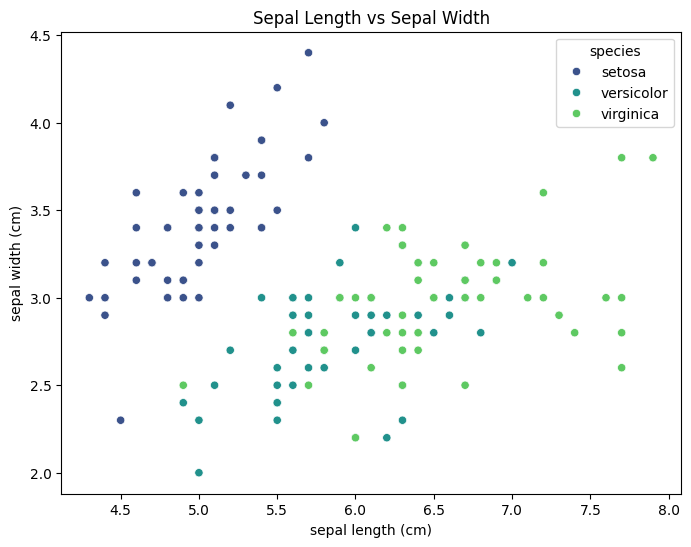

In [49]:
plt.figure(figsize=(8, 6))  #Visualize the dataset with sepal measurements
sns.scatterplot(x='sepal length (cm)',y= 'sepal width (cm)',hue = 'species',palette = 'viridis',data=iris_df)
plt.title('Sepal Length vs Sepal Width')
plt.show()

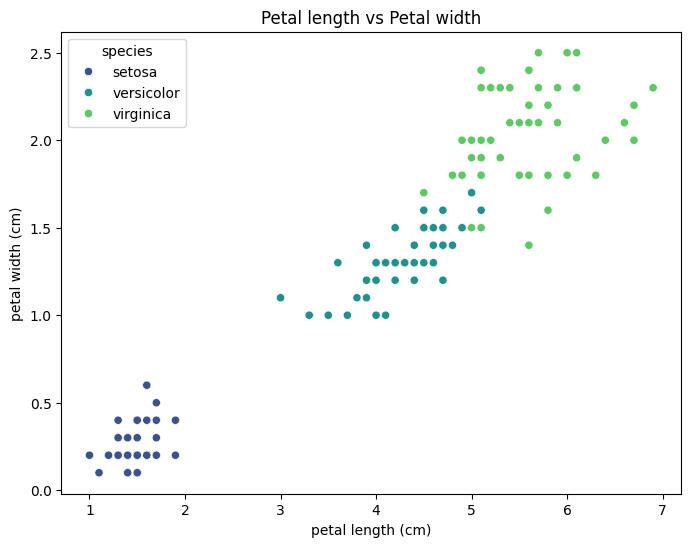

In [50]:
plt.figure(figsize=(8, 6)) #Visualize the dataset with petal measurements
sns.scatterplot(x='petal length (cm)',y= 'petal width (cm)',hue = 'species',palette = 'viridis',data=iris_df)
plt.title('Petal length vs Petal width')
plt.show()

In [19]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#2.CLUSTERING ALGORITHM IMPLEMENTATION:

#**A. KMeans clustering:**

##**How K-Means Clustering Works**
###K-Means is an algorithm that divides data into k clusters based on similarity. It works by:

###Initializing Centroids: Randomly choosing k points as initial cluster centers.
###Assigning Points: Each point is assigned to the nearest centroid.
###Updating Centroids: The centroids are updated to the mean of points in each cluster.
###Repeating until centroids stabilize, yielding k optimized clusters.


#**Why K-Means is Suitable for the Iris Dataset**
###The Iris dataset, with its distinct flower species, has natural clusters based on features (sepal/petal length and width). K-Means is effective because:

###Distinct Clusters: Species form clear groups that align well with K-Means clustering.
###Low Dimensionality: With just four features, K-Means can efficiently separate the data.
###Interpretability: The results closely match the known species, making K-Means ideal for exploring the Iris dataset.







In [21]:
kmeans_cluster = KMeans(n_clusters = 3, n_init=25,random_state = 45)
kmeans_cluster = kmeans_cluster.fit(iris_x_df)
kmeans_cluster

KMeans(n_clusters=3, n_init=25, random_state=45)

In [22]:
clustered = kmeans_cluster.labels_
clustered

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [52]:
kmeans_cluster.n_iter_  #number of iterations run by the KMeans algorithm for convergence

6

In [51]:
clustered_df = iris_x_df.copy() #create a copy of the dataset
clustered_df['clustered'] = clustered
clustered_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clustered
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


##visualize the clusters:

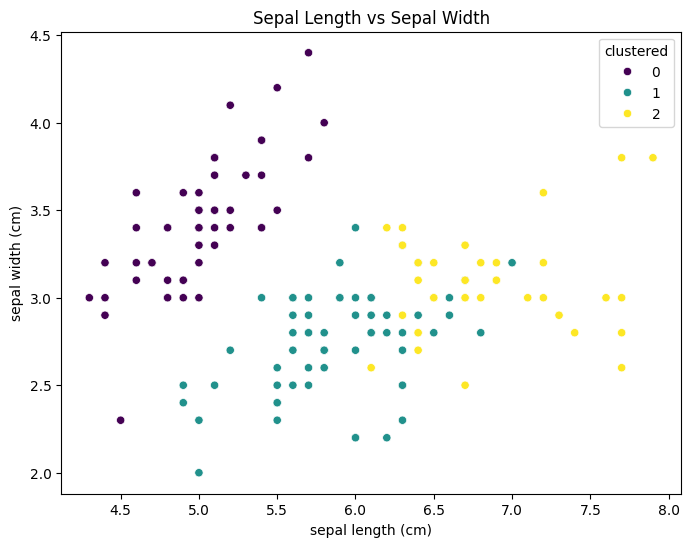

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='sepal length (cm)',y= 'sepal width (cm)',hue = 'clustered',palette = 'viridis',data=clustered_df)
plt.title('Sepal Length vs Sepal Width')
plt.show()

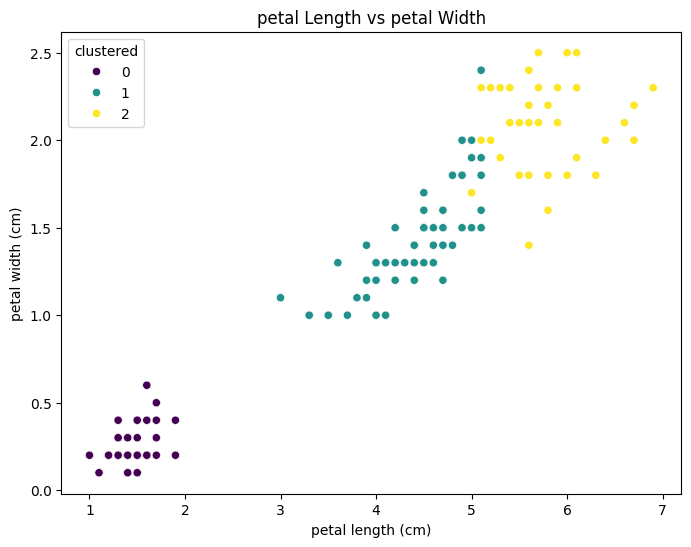

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='petal length (cm)',y= 'petal width (cm)',hue = 'clustered',palette = 'viridis',data=clustered_df)
plt.title('petal Length vs petal Width')
plt.show()

##Silhoutte score:
##1 indicates that clusters are well-separated, and each sample is far from other clusters.
##0 suggests overlapping clusters, where the sample is on or very close to the decision boundary between two clusters.
##-1 implies that samples are likely assigned to the wrong clusters.

In [27]:
silhouette_score(iris_x_df,clustered) #show silhouette score:

0.5528190123564095

#**B. Hierarchial Clustering:**

#**How Hierarchical Clustering Works:**
##Hierarchical clustering groups data in a way that creates a tree-like structure, showing how clusters are related. It works by:

##1.Starting with each point as its own cluster.
##2.Gradually merging the closest clusters step-by-step until all points are combined into a single cluster.

##This process can be visualized in a dendrogram, which helps us see how clusters connect at different levels.

#**Why Hierarchical Clustering is Good for the Iris Dataset:**
##The Iris dataset has three types of flowers (species) that naturally group together based on their features (like petal size). Hierarchical clustering is good for this dataset because:

##**1.Clear Subgroups:** It can reveal the natural groupings between flower types.
##**2.Flexible Levels:** We can see clusters at different levels, helping us understand the relationships between species.
##**3.Works Well with Small Data:** Since the Iris dataset is small, hierarchical clustering is efficient and effective.
##*Hierarchical clustering gives us a clear visual of how different types of irises are similar or different from each other.*

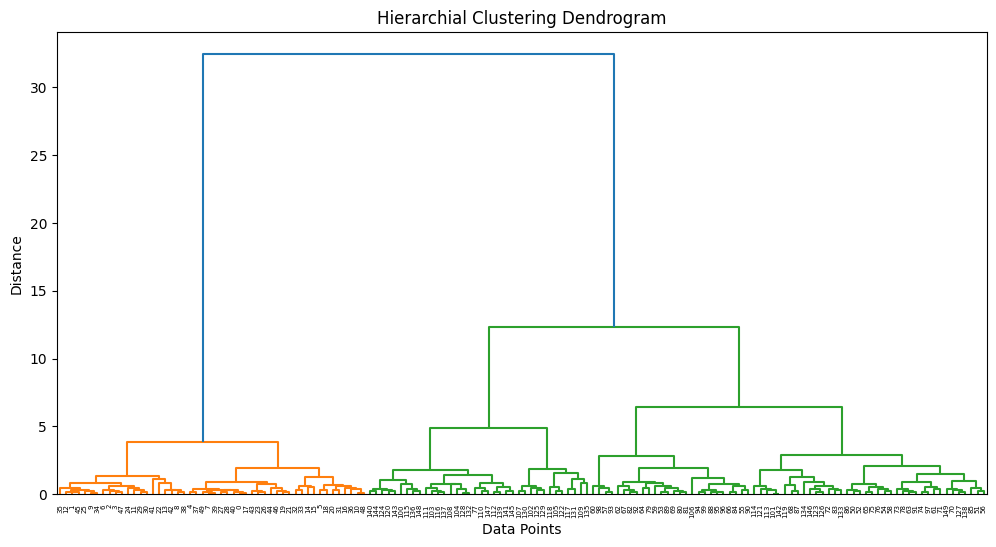

In [32]:
link_mtrx = linkage(iris_x_df, method='ward') #linkage matrix

plt.figure(figsize=(12,6))
dendrogram(link_mtrx)
plt.title("Hierarchial Clustering Dendrogram")
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [36]:
hier = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage='ward')
hier.fit(iris_x_df) #fit the model to the data
hier_cluster = hier.labels_
hier_cluster  #show the clustered label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [37]:
iris_x_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
hier_cluster_df = iris_x_df.copy() #make a copy of the dataset
hier_cluster_df['clustered'] = hier_cluster #add clustered label to the df
hier_cluster_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clustered
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


##Visualize the clusters:

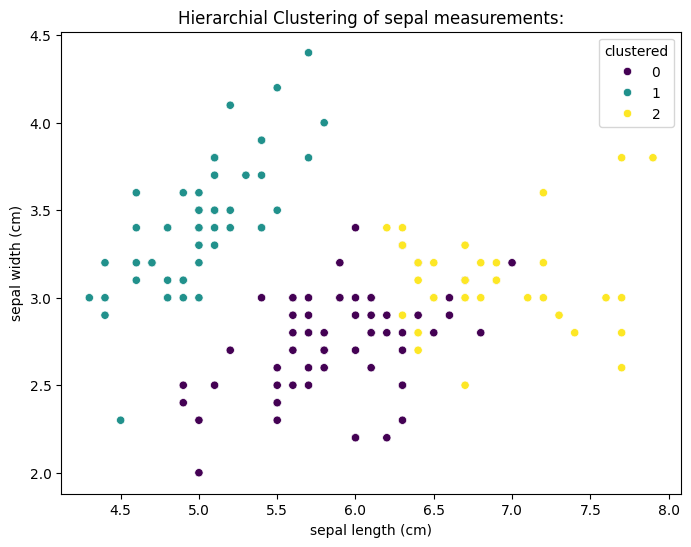

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='sepal length (cm)',y= 'sepal width (cm)',hue = 'clustered',palette = 'viridis',data=hier_cluster_df)
plt.title('Hierarchial Clustering of sepal measurements:')
plt.show()


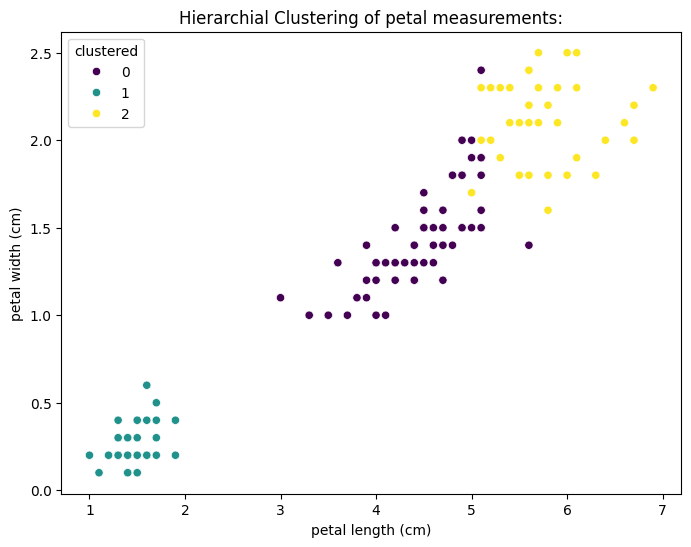

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='petal length (cm)',y= 'petal width (cm)',hue = 'clustered',palette = 'viridis',data=hier_cluster_df)
plt.title('Hierarchial Clustering of petal measurements:')
plt.show()

In [47]:
#Find silhoutte score:
silhouette_score(iris_x_df,hier_cluster)

0.5543236611296419

#**INFERENCE:**
## Both clustering methods work well, with hierarchical clustering having a slightly higher silhouette score (**0.5543236611296419** vs **0.5528190123564095** for K-Means). This suggests that hierarchical clustering may be slightly better at separating clusters in this data, but the difference is minimal.